В этом датасете содержатся данные по средней годовой смертности на
100000 населения и концентрации кальция в питьевой воде для 61
большого города в Англии и Уэльсе. Города дополнительно поделены на
северные и южные.

Задание 1.
Ответить на вопрос: есть ли связь между жёсткостью воды и средней годовой смертностью?

Построить точечный график
Рассчитать коэффициенты корреляции Пирсона и Спирмена
Построить модель линейной регрессии
Рассчитать коэффициент детерминации
Вывести график остатков

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('water.csv')
df.head()

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18


<AxesSubplot:xlabel='hardness', ylabel='mortality'>

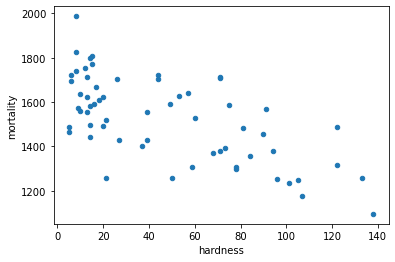

In [8]:
df.plot(kind='scatter', x='hardness', y='mortality')

In [9]:
#Рассчитать коэффициенты корреляции Пирсона и Спирмена
df[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.654849
mortality,-0.654849,1.000000


In [10]:
df[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.631665
mortality,-0.631665,1.000000


In [14]:
#модель Линейной Регрессии
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [15]:
X = df[['hardness']]
y = df['mortality']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [17]:
X_train.shape

(42, 1)

In [18]:
y_train.shape

(42,)

In [19]:
model = LinearRegression()
model.fit(X_train, y_train)  

LinearRegression()

In [20]:
model.coef_

array([-3.13167087])

In [21]:
model.intercept_

1668.9722977277095

In [22]:
y_pred = model.predict(X_test)
y_pred

array([1340.14685615, 1637.65558901, 1625.12890552, 1531.17877935,
       1424.7019697 , 1606.33888028, 1252.46007173, 1434.09698232,
       1603.20720941, 1650.18227249, 1484.20371627, 1415.30695708,
       1546.83713371, 1625.12890552, 1446.62366581, 1546.83713371,
       1637.65558901, 1621.99723465, 1352.67353964])

In [23]:
#коэфф детерминации
model.score(X_test, y_test)

0.5046490611017092

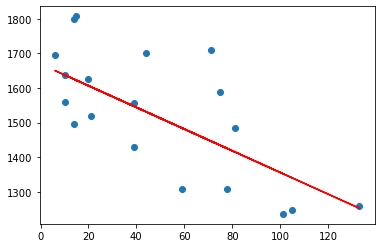

In [24]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

In [37]:
#график остатков

<AxesSubplot:xlabel='hardness', ylabel='mortality'>

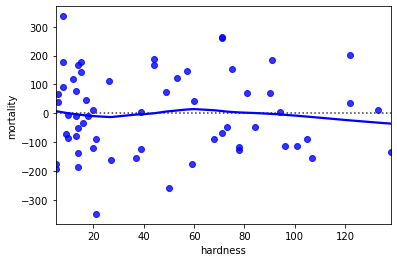

In [38]:
sns.residplot(x=X, y=y, lowess=True, color="b")

остатки распределены хаотично, закономерностей нет, => модель хорошая

Задание 2.
Ответить на вопрос: сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?
Разделить данные на 2 группы
Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности

In [75]:
df_north = df.loc[df.location == 'North']
df_north.head()

,Unnamed: 0,location,town,mortality,hardness
1,2,North,Birkenhead,1668,17
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18
5,6,North,Bolton,1558,10
6,7,North,Bootle,1807,15


<AxesSubplot:xlabel='hardness', ylabel='mortality'>

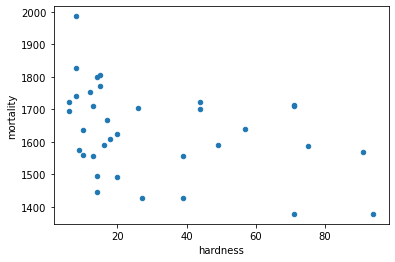

In [44]:
df_north.plot(kind='scatter', x='hardness', y='mortality')

In [45]:
#Рассчитать коэффициенты корреляции Пирсона и Спирмена
df_north[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.368598
mortality,-0.368598,1.000000


In [46]:
df_north[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.404208
mortality,-0.404208,1.000000


In [47]:
#модель Линейной Регрессии
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [48]:
X = df_north[['hardness']]
y = df_north['mortality']

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [50]:
model = LinearRegression()
model.fit(X_train, y_train)  

LinearRegression()

In [51]:
y_pred = model.predict(X_test)
y_pred

array([1672.33533095, 1670.35846869, 1660.47415739, 1676.28905547,
       1656.52043287, 1547.79300857, 1601.16828959, 1672.33533095,
       1611.05260089, 1658.49729513, 1611.05260089])

In [53]:
#коэфф детерминации
model.score(X_test, y_test)

0.018885304285745863

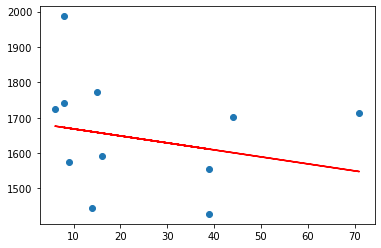

In [54]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

<AxesSubplot:xlabel='hardness', ylabel='mortality'>

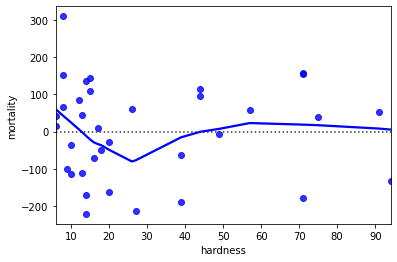

In [52]:
sns.residplot(x=X, y=y, lowess=True, color="b")

по коэф детерминации (низкое значение) и графику остатков (перевернутая парабола) видно, что модель не очень хорошая

In [74]:
df_south = df.loc[df.location == 'South']
df_south.head()

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
2,3,South,Birmingham,1466,5
7,8,South,Bournemouth,1299,78
9,10,South,Brighton,1359,84
10,11,South,Bristol,1392,73


<AxesSubplot:xlabel='hardness', ylabel='mortality'>

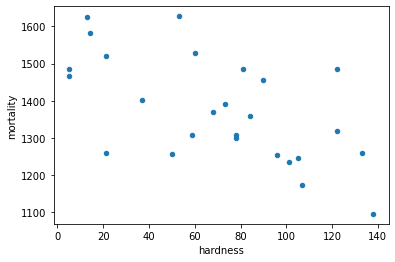

In [56]:
df_south.plot(kind='scatter', x='hardness', y='mortality')

In [57]:
#Рассчитать коэффициенты корреляции Пирсона и Спирмена
df_south[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.602153
mortality,-0.602153,1.000000


In [67]:
df_south[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.595723
mortality,-0.595723,1.000000


In [68]:
#модель Линейной Регрессии
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [69]:
X = df_south[['hardness']]
y = df_south['mortality']

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [71]:
model = LinearRegression()
model.fit(X_train, y_train)  

LinearRegression()

In [72]:
y_pred = model.predict(X_test)
y_pred

array([1211.58209643, 1622.65331428, 1271.31039304, 1211.58209643,
       1510.22357948, 1566.43844688, 1432.92813681, 1622.65331428])

In [63]:
#коэфф детерминации
model.score(X_test, y_test)

-2.5519223012352077

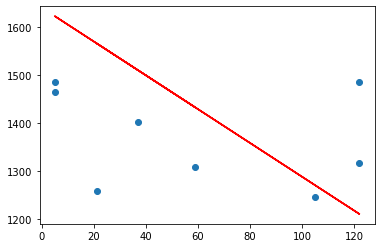

In [64]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

<AxesSubplot:xlabel='hardness', ylabel='mortality'>

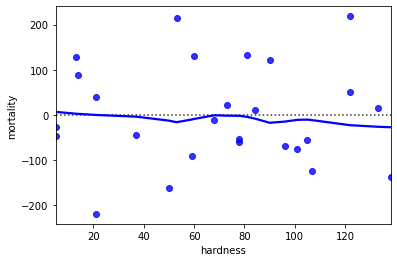

In [66]:
sns.residplot(x=X, y=y, lowess=True, color="b")

коэф дереминации отрицательный => модель не описывает зависимость. на графике анализа остатков точки далеко расположены. возможно, недостаточно данных.